<a href="https://colab.research.google.com/github/ZefraAlseif/Project1_Wine_Network/blob/main/RegressionModel_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adapting the original wine data to a regression model and classification model

In [1]:
#@title Data as Numpy Arrays
import matplotlib.pyplot as plt
import numpy as np
# This time we need to also import pandas
import pandas as pd
from io import StringIO

# Read in white wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')

# Read in red wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

red['type'] = 1
white['type'] = 0

wines = red.append(white, ignore_index = True)

# Import SKLEARN
import sklearn

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Specify the data -
X1 = wines.iloc[:, 0:11]
X2 = wines.iloc[:,12]
X = pd.concat([X1,X2],axis = 1)

y = np.ravel(wines.quality)

# Splitting the data set for training and validating - Done with SKLEARN
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25, random_state = 45)

# Converting X_train & X_test DataFrame s to TF sensors
# Will use NumPy, TF, & Keras after this
# import tensorflow as tf

Xtrain = X_train.to_numpy()
X_valid = X_valid.to_numpy()

X_valid
# In reality:
# [1] ALL THE Xtrain patterns (with their y_train targets)
# will be used for TRAINING ([TR]), as Xtrain & y_train
# [2] MOST OF THE X_valid patterns (and their y_valid targets)
# will be used for VALIDATION ([TT]), as X_val & y_val
# BUT WE WILL SET ASIDE THE LAST 10 for "testing" ([TS])
# as X_tst & y_tst

# Retain the first 1615 patterns for validation ([TT])
Xval = X_valid[:1615]
Xval.shape

# and now set aside the last 10 for test
Xtst = X_valid[1615:]
Xtst.shape
# Setting Aside the Patterns to Normalize them
import copy
Xtrain_N = copy.copy(Xtrain)
Xval_N = copy.copy(Xval)
Xtst_N = copy.copy(Xtst)
mean = Xtrain_N.mean(axis=0)
Xtrain_N -= mean
std = Xtrain_N.std(axis=0)
Xtrain_N /= std
Xval_N -= mean
Xval_N /= std
Xtst_N -=mean 
Xtst_N /=std

# Same for the corresponding targets
# Retain the first 1615 for validation ([TT])
y_val = y_valid[:1615]
y_val.shape

y_tst = y_valid[1615:]
y_tst.shape 
y_tst

# Now, in addition, create the targets as one-hot-encoded 4 quality levels
# We will track these few targets through the conversion process
y_train[272:283]

# Function create rank-1 arrays where 3,4,5,6,7,8,9 are mapped to 1 or 2 or 3 or 4 
def to_4cs(x):
  lx = len(x)
  results = np.zeros(lx)
  for i in range(lx):
    # print("start")
    xa = x[i];
    if xa <= 3:
      results[i] = 1
    elif xa <= 6:
      results[i] = 2
    elif xa <= 8:
      results[i] = 3
    else:
      results[i] = 4
    # results [i, label] = 1
  results = results.astype(int)
  return results

train_labels = to_4cs(y_train)
val_labels = to_4cs(y_val)
tst_labels = to_4cs(y_tst)

# Let's verify that the training targets that we are tracking 
# were converted to levels (1 = BAD; 2 = Medium; 3 = GOOD; 4- Excellent) correctly:
train_labels[272:283]

# Now, one shot encoding of all 3 target arrays
# define a function to do the 

def to_one_hot(labels, dimension = 4):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels-1):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_val_labels = to_one_hot(val_labels)
one_hot_tst_labels = to_one_hot(tst_labels)

#Let's verify that the training targets we have tracked were
# one-hot encoded correctly
Xtrain.shape

# SO, AFTER EXECUTING THIS CELL, YOU WILL HAVE:
# FOR TRAINING:
# Xtrain (4872, 12)...y_train (4872,)...train_labels(4872,)....one_hot_train_labels (4872,4)
# FOR VALIDATING:
# Xval (1615, 12)...y_val (1615,)...val_labels(1615,)...one_hot_val_labels (1615,4)
# FOR TESTING:
# Xtst (10, 12)...y_tst (10,)...tst_labels(10,)... one_hot_tst_labels (10,4)
# PLEASE DO NOT CHANGE THE NAMES OF THESE VARIABLES (So that instructor can use them)


(4872, 12)

# II.1 Regression Model 1 (regmodl1)

In [2]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl1():
  regmodl1 = keras.Sequential(
      [
        layers.Dense(8, activation = 'relu'),
        layers.Dense(1)
      ]
)
  regmodl1.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return regmodl1

regmodl1 = build_regmodl1()
history_regmodl1 = regmodl1.fit(x = Xtrain_N,y = y_train, batch_size = 32, epochs = 50, verbose = 2, validation_data = (Xval_N,y_val), validation_freq = 1)

#regmodl1.summary()

Epoch 1/50
153/153 - 1s - loss: 29.9605 - mae: 5.1215 - val_loss: 21.8073 - val_mae: 4.2997 - 1s/epoch - 8ms/step
Epoch 2/50
153/153 - 0s - loss: 16.7815 - mae: 3.6913 - val_loss: 11.8517 - val_mae: 2.9941 - 254ms/epoch - 2ms/step
Epoch 3/50
153/153 - 0s - loss: 8.7529 - mae: 2.5006 - val_loss: 5.8922 - val_mae: 1.9848 - 264ms/epoch - 2ms/step
Epoch 4/50
153/153 - 0s - loss: 4.2198 - mae: 1.6421 - val_loss: 3.0020 - val_mae: 1.3538 - 249ms/epoch - 2ms/step
Epoch 5/50
153/153 - 0s - loss: 2.4521 - mae: 1.2209 - val_loss: 2.0403 - val_mae: 1.0994 - 261ms/epoch - 2ms/step
Epoch 6/50
153/153 - 0s - loss: 1.7552 - mae: 1.0253 - val_loss: 1.5468 - val_mae: 0.9548 - 266ms/epoch - 2ms/step
Epoch 7/50
153/153 - 0s - loss: 1.3488 - mae: 0.8996 - val_loss: 1.2522 - val_mae: 0.8610 - 246ms/epoch - 2ms/step
Epoch 8/50
153/153 - 0s - loss: 1.1087 - mae: 0.8156 - val_loss: 1.0659 - val_mae: 0.7964 - 254ms/epoch - 2ms/step
Epoch 9/50
153/153 - 0s - loss: 0.9424 - mae: 0.7514 - val_loss: 0.9281 - val_m

## Plot of Regression Model 1 and Final Values









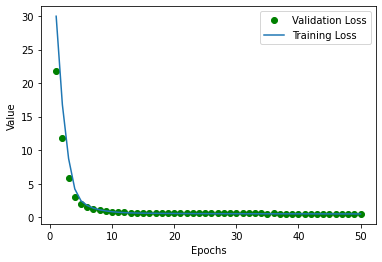

Final Training loss:  0.497934490442276 
Final Training MAE:  0.5501664280891418
Final Validation loss:  0.5383334755897522 
Final Validation MAE:  0.5678662061691284


In [3]:
# Plot the validation and training loss
plt.plot(range(1, len(history_regmodl1.history['val_loss']) + 1), history_regmodl1.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_regmodl1.history['loss']) + 1), history_regmodl1.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_regmodl1.history['loss'][-1],"\nFinal Training MAE: ", history_regmodl1.history['mae'][-1])
print("Final Validation loss: ",history_regmodl1.history['val_loss'][-1],"\nFinal Validation MAE: ", history_regmodl1.history['val_mae'][-1])

# II.2 Regression Model 2 (regmodl2)

In [4]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl2():
  regmodl2 = keras.Sequential(
      [
        layers.Dense(100, activation = 'relu'),
        layers.Dense(50, activation = 'relu'),
        layers.Dense(80, activation = 'relu'),
        layers.Dense(20, activation='relu'), 
        layers.Dense(1)
      ]
  )
  regmodl2.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return regmodl2

regmodl2 = build_regmodl2()
history_regmodl2 = regmodl2.fit(x = Xtrain_N,y = y_train, batch_size = 64, epochs = 150, verbose = 2, validation_data = (Xval_N,y_val), validation_freq = 1)

#regmodl2.summary()

Epoch 1/150
77/77 - 1s - loss: 5.2322 - mae: 1.6271 - val_loss: 1.5081 - val_mae: 0.9109 - 1s/epoch - 15ms/step
Epoch 2/150
77/77 - 0s - loss: 0.9756 - mae: 0.7595 - val_loss: 1.0940 - val_mae: 0.7992 - 181ms/epoch - 2ms/step
Epoch 3/150
77/77 - 0s - loss: 0.7205 - mae: 0.6560 - val_loss: 0.7808 - val_mae: 0.6860 - 206ms/epoch - 3ms/step
Epoch 4/150
77/77 - 0s - loss: 0.6256 - mae: 0.6152 - val_loss: 0.6088 - val_mae: 0.5938 - 179ms/epoch - 2ms/step
Epoch 5/150
77/77 - 0s - loss: 0.5864 - mae: 0.5946 - val_loss: 0.6715 - val_mae: 0.6320 - 204ms/epoch - 3ms/step
Epoch 6/150
77/77 - 0s - loss: 0.5663 - mae: 0.5869 - val_loss: 0.9924 - val_mae: 0.7978 - 181ms/epoch - 2ms/step
Epoch 7/150
77/77 - 0s - loss: 0.5316 - mae: 0.5685 - val_loss: 1.0897 - val_mae: 0.8234 - 189ms/epoch - 2ms/step
Epoch 8/150
77/77 - 0s - loss: 0.5353 - mae: 0.5727 - val_loss: 1.3830 - val_mae: 0.9699 - 197ms/epoch - 3ms/step
Epoch 9/150
77/77 - 0s - loss: 0.5230 - mae: 0.5652 - val_loss: 0.9723 - val_mae: 0.7769 -

## Plot of Regression Model 2

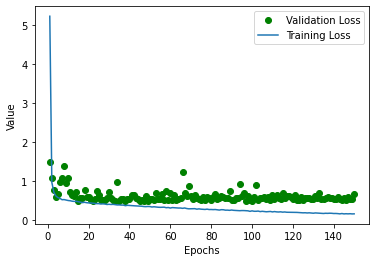

Final Training loss:  0.16987952589988708 
Final Training MAE:  0.31660839915275574
Final Validation loss:  0.6683626174926758 
Final Validation MAE:  0.6275699734687805


In [5]:
# Plot the validation and training loss
plt.plot(range(1, len(history_regmodl2.history['val_loss']) + 1), history_regmodl2.history['val_loss'], 'go',label = "Validation Loss")
plt.plot(range(1, len(history_regmodl2.history['loss']) + 1), history_regmodl2.history['loss'], label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_regmodl2.history['loss'][-1],"\nFinal Training MAE: ", history_regmodl2.history['mae'][-1])
print("Final Validation loss: ",history_regmodl2.history['val_loss'][-1],"\nFinal Validation MAE: ", history_regmodl2.history['val_mae'][-1])

# II.3 Regression Model 3 (regmodl3)

In [13]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl3():
  regmodl3 = keras.Sequential(
      [
        layers.Dense(100, activation = 'relu'),
        layers.Dense(50, activation = 'relu'),
        layers.Dense(80, activation = 'relu'),
        layers.Dense(20, activation='relu'), 
        layers.Dense(1)
      ]
  )
  regmodl3.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return regmodl3

regmodl3 = build_regmodl3()
history_regmodl3 = regmodl3.fit(x = Xtrain_N,y = y_train, batch_size = 128, epochs = 50, verbose = 2, validation_data = (Xval_N,y_val), validation_freq = 1)
#regmodl3.summary()

Epoch 1/50
39/39 - 1s - loss: 6.8360 - mae: 1.9651 - val_loss: 2.2778 - val_mae: 1.0897 - 1s/epoch - 26ms/step
Epoch 2/50
39/39 - 0s - loss: 1.3312 - mae: 0.8789 - val_loss: 2.3590 - val_mae: 1.1610 - 109ms/epoch - 3ms/step
Epoch 3/50
39/39 - 0s - loss: 0.9659 - mae: 0.7595 - val_loss: 1.8218 - val_mae: 1.0403 - 116ms/epoch - 3ms/step
Epoch 4/50
39/39 - 0s - loss: 0.7814 - mae: 0.6814 - val_loss: 0.7425 - val_mae: 0.6396 - 111ms/epoch - 3ms/step
Epoch 5/50
39/39 - 0s - loss: 0.6837 - mae: 0.6455 - val_loss: 0.9566 - val_mae: 0.7752 - 106ms/epoch - 3ms/step
Epoch 6/50
39/39 - 0s - loss: 0.6065 - mae: 0.6099 - val_loss: 0.7100 - val_mae: 0.6369 - 115ms/epoch - 3ms/step
Epoch 7/50
39/39 - 0s - loss: 0.6243 - mae: 0.6112 - val_loss: 0.7880 - val_mae: 0.6773 - 110ms/epoch - 3ms/step
Epoch 8/50
39/39 - 0s - loss: 0.5661 - mae: 0.5883 - val_loss: 1.2395 - val_mae: 0.8867 - 104ms/epoch - 3ms/step
Epoch 9/50
39/39 - 0s - loss: 0.5885 - mae: 0.5956 - val_loss: 0.7169 - val_mae: 0.6611 - 116ms/ep

## Plot of Regression Model 3

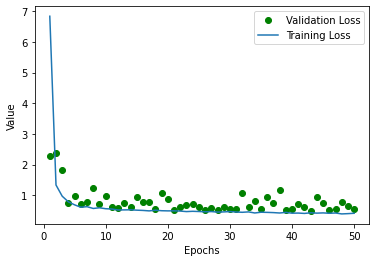

Final Training loss:  0.4093680679798126 
Final Training MAE:  0.49924442172050476
Final Validation loss:  0.5512082576751709 
Final Validation MAE:  0.5671980381011963


In [14]:
# Plot the validation and training loss
plt.plot(range(1, len(history_regmodl3.history['val_loss']) + 1), history_regmodl3.history['val_loss'], 'go',label = "Validation Loss")
plt.plot(range(1, len(history_regmodl3.history['loss']) + 1), history_regmodl3.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_regmodl3.history['loss'][-1],"\nFinal Training MAE: ", history_regmodl3.history['mae'][-1])
print("Final Validation loss: ",history_regmodl3.history['val_loss'][-1],"\nFinal Validation MAE: ", history_regmodl3.history['val_mae'][-1])

## Predicting the Output

In [17]:
predict_labels = regmodl3.predict(Xtst_N)
predict_labels_T=predict_labels.T
error = y_tst - predict_labels_T
predict_table = pd.DataFrame(Xtst)
predict_table['activation'] = predict_labels
predict_table['target'] = y_tst
predict_table['error'] = error.T
# Renaming the columns of the table
predict_table.columns.values[0] = "f1"
predict_table.columns.values[1] = "f2"
predict_table.columns.values[2] = "f3"
predict_table.columns.values[3] = "f4"
predict_table.columns.values[4] = "f5"
predict_table.columns.values[5] = "f6"
predict_table.columns.values[6] = "f7"
predict_table.columns.values[7] = "f8"
predict_table.columns.values[8] = "f9"
predict_table.columns.values[9] = "f10"
predict_table.columns.values[10] = "f11"
predict_table.columns.values[11] = "f12"
display(predict_table)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,activation,target,error
0,7.4,0.44,0.20,11.5,0.049,44.0,157.0,0.99800,3.27,0.44,9.000000,0.0,4.817978,5,0.182022
1,6.5,0.23,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.800000,0.0,5.077383,5,-0.077383
2,5.6,0.41,0.24,1.9,0.034,10.0,53.0,0.98815,3.32,0.50,13.500000,0.0,6.584135,7,0.415865
3,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.400000,1.0,5.471700,6,0.528300
4,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.99340,3.08,0.45,9.100000,0.0,6.093779,5,-1.093779
5,6.9,0.41,0.33,10.1,0.043,28.0,152.0,0.99680,3.20,0.52,9.400000,0.0,5.068320,5,-0.068320
6,5.9,0.32,0.33,2.1,0.027,35.0,138.0,0.98945,3.37,0.42,12.700000,0.0,6.789161,6,-0.789161
7,6.0,0.24,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,11.733333,0.0,6.101869,6,-0.101869
8,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.000000,1.0,5.896888,7,1.103112
9,7.4,0.24,0.22,10.7,0.042,26.0,81.0,0.99540,2.86,0.36,9.700000,0.0,6.140839,6,-0.140839
